# HR-analysis 

ในบทนี้เราจะลองนำข้อมูลที่เคยใช้ในการประมารการแบบ Logistic regression มาลองประมาณการแบบ decision tree แล้วจะนำผลมาเปรียบเทียบกันว่า model ไหนประมาณการข้อมูลชุดนี้ออกมาได้ดีที่สุด 

เราจะทำการวิเคราะห์ปัจจัยอะไรที่ส่งผลให้ทำคนลาออกจากงาน โดยผลลัพธ์ของเรามี 2 อย่างคือ yes = ลาออก, No = อยู่ เราจำเป็นที่จะต้องวิเคราะห์ว่า ปัจจัยอะไรบ้างที่ทำให้คนลาออก เพื่อที่เราจะได้ปรับปรุงปัจจัยนั้นๆ ป้องกันไม่ให้คนลาออก

และในที่นี้ เราต้องการที่จะหา model ที่สามารถนำไปใช้กับข้อมูลใหม่ๆด้วย ดังนั้นเราจะมีการ split ข้อมูลออกเป็น training set และ testing set ด้วย

## 1.เตรียมข้อมูล

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data=pd.read_csv('https://github.com/Siriratkant/Logistic-regression/raw/master/general_data.csv',  parse_dates=True, index_col='EmployeeID')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
stocks = ['general_data', 'employee_survey_data']
dfs = []
location_prefix = 'https://github.com/Siriratkant/Logistic-regression/raw/master/'
dfs = [pd.read_csv(f'{location_prefix}{s}.csv', parse_dates=True, index_col='EmployeeID') for s in stocks]

In [4]:
type(dfs)

list

In [5]:
df=pd.concat(dfs,axis=1)
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0


In [6]:
df.PercentSalaryHike.value_counts() 

11    630
13    627
14    603
12    594
15    303
18    267
17    246
16    234
19    228
22    168
20    165
21    144
23     84
24     63
25     54
Name: PercentSalaryHike, dtype: int64

In [7]:
df2=df.drop(['BusinessTravel', 'Department' , 'EducationField', 'Over18' ,'JobRole', 'MaritalStatus','NumCompaniesWorked','EmployeeCount','Education','StandardHours'], axis=1)
df2.head()

,Age,Attrition,DistanceFromHome,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,,,,,,,,,,,,,,
1,51,No,6,Female,1,131160,11,0,1.0,6,1,0,0,3.0,4.0,2.0
2,31,Yes,10,Female,1,41890,23,1,6.0,3,5,1,4,3.0,2.0,4.0
3,32,No,17,Male,4,193280,15,3,5.0,2,5,0,3,2.0,2.0,1.0
4,38,No,2,Male,3,83210,11,3,13.0,5,8,7,5,4.0,4.0,3.0
5,32,No,10,Male,1,23420,12,2,9.0,2,6,0,4,4.0,1.0,3.0


In [8]:
def label2val(s):
    d = {'No': 0, 'Yes': 1 }
    if s in d.keys():
        v = d[s]
    else:
        v = np.nan
    return v

In [9]:
label2val('Yes')

1

In [10]:
df2[['Attrition']].applymap(label2val)

,Attrition
EmployeeID,
1,0
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [11]:
likert_cols = ['Attrition']
df2[likert_cols]=df2[likert_cols].applymap(label2val)

In [12]:
df2.dropna(inplace=True) # ตัด missing value
df2.head()

,Age,Attrition,DistanceFromHome,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,,,,,,,,,,,,,,
1,51,0,6,Female,1,131160,11,0,1.0,6,1,0,0,3.0,4.0,2.0
2,31,1,10,Female,1,41890,23,1,6.0,3,5,1,4,3.0,2.0,4.0
3,32,0,17,Male,4,193280,15,3,5.0,2,5,0,3,2.0,2.0,1.0
4,38,0,2,Male,3,83210,11,3,13.0,5,8,7,5,4.0,4.0,3.0
5,32,0,10,Male,1,23420,12,2,9.0,2,6,0,4,4.0,1.0,3.0


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4319 entries, 1 to 4409
Data columns (total 16 columns):
Age                        4319 non-null int64
Attrition                  4319 non-null int64
DistanceFromHome           4319 non-null int64
Gender                     4319 non-null object
JobLevel                   4319 non-null int64
MonthlyIncome              4319 non-null int64
PercentSalaryHike          4319 non-null int64
StockOptionLevel           4319 non-null int64
TotalWorkingYears          4319 non-null float64
TrainingTimesLastYear      4319 non-null int64
YearsAtCompany             4319 non-null int64
YearsSinceLastPromotion    4319 non-null int64
YearsWithCurrManager       4319 non-null int64
EnvironmentSatisfaction    4319 non-null float64
JobSatisfaction            4319 non-null float64
WorkLifeBalance            4319 non-null float64
dtypes: float64(4), int64(11), object(1)
memory usage: 573.6+ KB


In [14]:
df2['EnvironmentSatisfaction'] =df2['EnvironmentSatisfaction'] .astype(int) 
df2['JobSatisfaction'] =df2['JobSatisfaction'] .astype(int)
df2['WorkLifeBalance'] =df2['WorkLifeBalance'] .astype(int)
df2['TotalWorkingYears'] = df2['TotalWorkingYears'] .astype(int)

In [15]:
df2.head()

,Age,Attrition,DistanceFromHome,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,,,,,,,,,,,,,,
1,51,0,6,Female,1,131160,11,0,1,6,1,0,0,3,4,2
2,31,1,10,Female,1,41890,23,1,6,3,5,1,4,3,2,4
3,32,0,17,Male,4,193280,15,3,5,2,5,0,3,2,2,1
4,38,0,2,Male,3,83210,11,3,13,5,8,7,5,4,4,3
5,32,0,10,Male,1,23420,12,2,9,2,6,0,4,4,1,3


In [16]:
df2.EnvironmentSatisfaction.value_counts()

3    1327
4    1317
2     842
1     833
Name: EnvironmentSatisfaction, dtype: int64

In [17]:
a = pd.get_dummies(df2['Gender'], prefix = "Gender")
b = pd.get_dummies(df2['JobLevel'], prefix = "JobLevel")
c = pd.get_dummies(df2['StockOptionLevel'], prefix = "StockOptionLevel")
d = pd.get_dummies(df2['TrainingTimesLastYear'], prefix = "TrainingTimesLastYear")
e = pd.get_dummies(df2['WorkLifeBalance'], prefix = "WorkLifeBalance")
f = pd.get_dummies(df2['EnvironmentSatisfaction'], prefix = "EnvironmentSatisfaction")
g = pd.get_dummies(df2['JobSatisfaction'], prefix = "JobSatisfaction")

In [18]:
frames = [df2, a, b, c,d,e,f,g]
df2 = pd.concat(frames, axis = 1)
df2.head()

,Age,Attrition,DistanceFromHome,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,0,6,Female,1,131160,11,0,1,6,1,0,0,3,4,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,31,1,10,Female,1,41890,23,1,6,3,5,1,4,3,2,4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,32,0,17,Male,4,193280,15,3,5,2,5,0,3,2,2,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,38,0,2,Male,3,83210,11,3,13,5,8,7,5,4,4,3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
5,32,0,10,Male,1,23420,12,2,9,2,6,0,4,4,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [19]:
df2 = df2.drop(columns = ['Gender','JobLevel', 'StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction'])
df2.head()

,Age,Attrition,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,0,6,131160,11,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,31,1,10,41890,23,6,5,1,4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,32,0,17,193280,15,5,5,0,3,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,38,0,2,83210,11,13,8,7,5,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
5,32,0,10,23420,12,9,6,0,4,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


## 2.แบ่งข้อมูล

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df2.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'MonthlyIncome',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Gender_Female',
       'Gender_Male', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'StockOptionLevel_0', 'StockOptionLevel_1',
       'StockOptionLevel_2', 'StockOptionLevel_3', 'TrainingTimesLastYear_0',
       'TrainingTimesLastYear_1', 'TrainingTimesLastYear_2',
       'TrainingTimesLastYear_3', 'TrainingTimesLastYear_4',
       'TrainingTimesLastYear_5', 'TrainingTimesLastYear_6',
       'WorkLifeBalance_1', 'WorkLifeBalance_2', 'WorkLifeBalance_3',
       'WorkLifeBalance_4', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'JobSatisfaction_1', 'JobSatisfaction_2',
       'JobSatisfaction_3', 'JobSatisfaction_4'],
      dtype='object')

In [22]:
df2.shape

(4319, 39)

In [23]:
columns = ['Age', 'DistanceFromHome', 'MonthlyIncome',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Gender_Female',
       'Gender_Male', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'StockOptionLevel_0', 'StockOptionLevel_1',
       'StockOptionLevel_2', 'StockOptionLevel_3', 'TrainingTimesLastYear_0',
       'TrainingTimesLastYear_1', 'TrainingTimesLastYear_2',
       'TrainingTimesLastYear_3', 'TrainingTimesLastYear_4',
       'TrainingTimesLastYear_5', 'TrainingTimesLastYear_6',
       'WorkLifeBalance_1', 'WorkLifeBalance_2', 'WorkLifeBalance_3',
       'WorkLifeBalance_4', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'JobSatisfaction_1', 'JobSatisfaction_2',
       'JobSatisfaction_3', 'JobSatisfaction_4']

In [24]:
y = df2.Attrition.values
x = df2[columns]

In [25]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.3,random_state = 7)

In [26]:
x_train.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1181,23,2,61790,11,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
3163,30,9,68250,14,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2108,31,21,99800,12,6,6,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1331,36,1,175670,13,7,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
27,26,9,162910,22,5,5,3,3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


## 3. ทำการประมาณการ

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model=DecisionTreeClassifier(criterion='gini') 
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
from sklearn.externals.six import StringIO  # StringIO จะทำหน้าที่เก็บค่าจาก export_graphviz
from sklearn.tree import export_graphviz
import pydotplus #เอาไว้แปลงข้อมูลเพื่อที่จะได้สร้างกราฟได้
from IPython.display import Image  

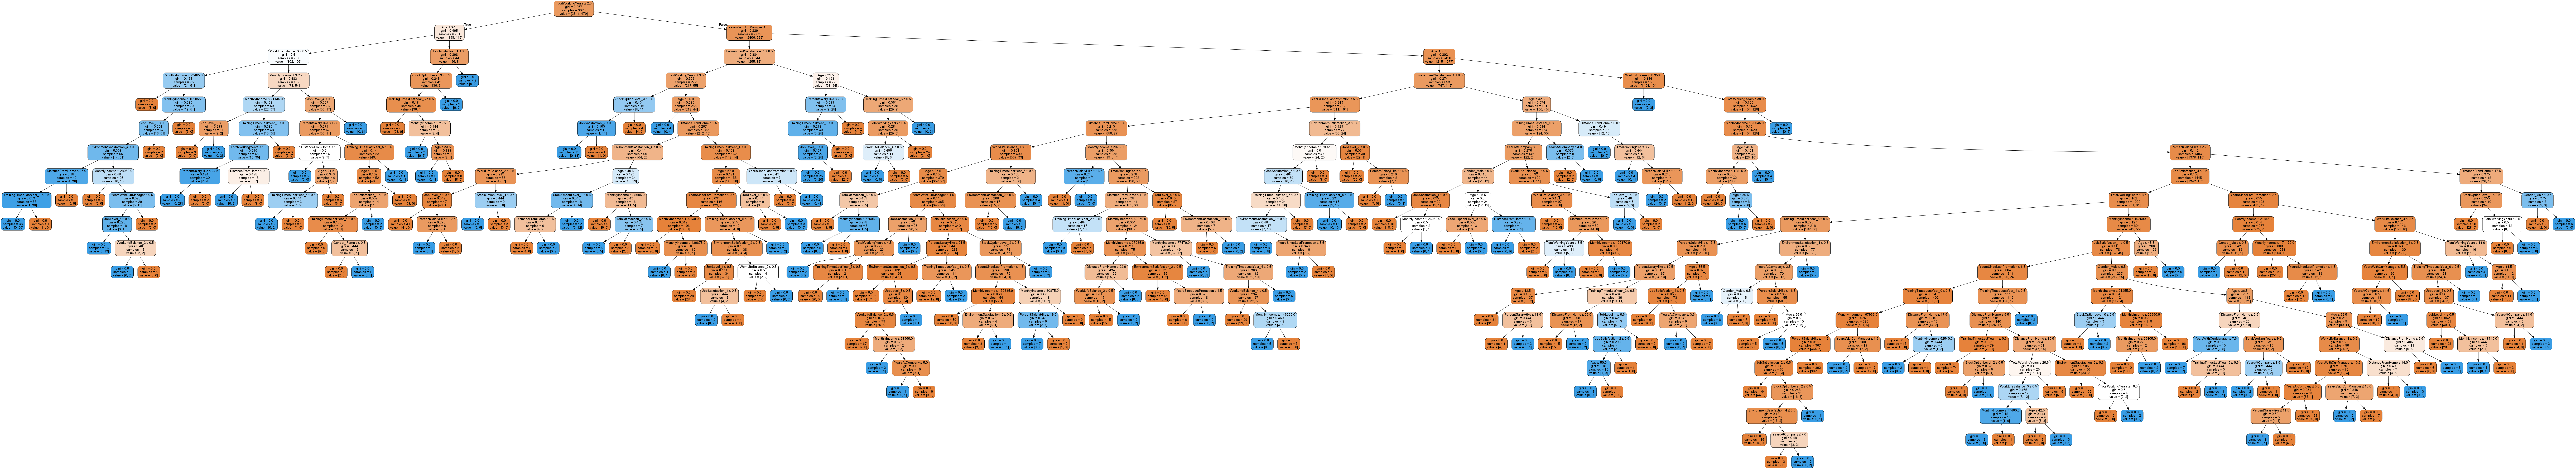

In [30]:
dot_data = StringIO() #สร้าง object ชื่อ dot_data และให้เท่ากับ StringIO
export_graphviz(model, out_file=dot_data,  #.ใส่ค่าลงไป โดยอันแรกเราก็จะใส่ model ที่เป็น object ที่เก็บค่าการประมาณการของเราไว้ และ 
                feature_names=columns, #คือ feature ที่เรามี 
                filled=True, rounded=True,  
                special_characters= True ) #เช่นพวกค่าน้อยกว่าหรือเท่ากับ

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) #สร้าง object ชื่อ graph เพื่อใส่คำสั่ง pydotplus ซึ่งเป็นคำสั่งในการ พล็อตรูป
Image(graph.create_png()) #และเราก็ใส่คำสั่ง Imageให้มันพล็อตกราฟที่เราสร้างไว้ให้ออกมาในรูป .png 

# อ่านคำสั่งเพิ่มเติมได้ที่ :  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [31]:
graph.write_png('HR-analysis.png') #คำสั่ง save รูปเป็น png ซึ่งรูปจะเก็บอยู่ใน directory เดียวกับ notebook นี้

True

## 4. นำ model ที่ได้จากการประมาณการมาใช้กับ x_test

In [32]:
predicted = model.predict(x_test)
predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## 5. วัดความแม่นยำโดยใช้ Confusion matrix

In [33]:
from sklearn import metrics

In [34]:
metrics.confusion_matrix(y_test,predicted)

array([[1039,   37],
       [  17,  203]], dtype=int64)

In [35]:
pd.crosstab(y_test, predicted)

col_0,0,1
row_0,,
0,1039,37
1,17,203


In [37]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, predicted).ravel()

$$\mathrm {Accuracy}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$$

In [38]:
Acurracy=(TP+TN)/(TP+TN+FP+FN)
Acurracy

0.9583333333333334

In [39]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1076
           1       0.85      0.92      0.88       220

   micro avg       0.96      0.96      0.96      1296
   macro avg       0.91      0.94      0.93      1296
weighted avg       0.96      0.96      0.96      1296



# สรุป

หลังจากทำการประมาณการเบื้องต้น จะเห็นได้ว่าผลจากการประมาณ decision tree นั้น แม่นยำกว่ากว่าใช้ logistic regression อาจจะเป็นเพราะ decision tree สามารถจัดการกับข้อมูลที่เป็น imbalance ได้ดีกว่า 